K nearest neighbors (kNN) is one of the simplest learning strategies: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class.

Let's try it out on our iris classification problem:

In [26]:
from sklearn import neighbors,datasets
import numpy as np
iris = datasets.load_iris()

x,y = iris.data,iris.target


import pandas as pd


pd.DataFrame(x,columns = [1,2,3,4])[0:10]



,1,2,3,4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [24]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [3]:

knn = neighbors.KNeighborsClassifier(n_neighbors = 5)


# fit the model
knn.fit(x, y)

# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
# call the "predict" method:
result = knn.predict([[3, 5, 4, 2],])

print(iris.target_names[result])
knn.predict_proba([[3, 5, 4, 2],])

array([[0. , 0.8, 0.2]])

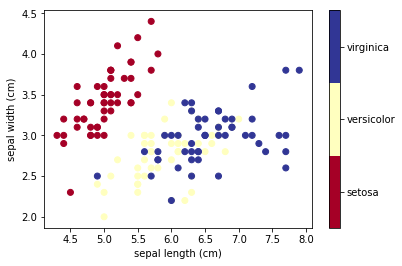

In [22]:
import matplotlib.pyplot as plt 

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(x[:,0], x[:,1],
            c=iris.target, cmap=plt.cm.get_cmap('RdYlBu', 3))
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)


plt.clim(-0.5, 2.5)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

(100, 100) (100, 100)
xx ravel (10000,)
(10000, 2)


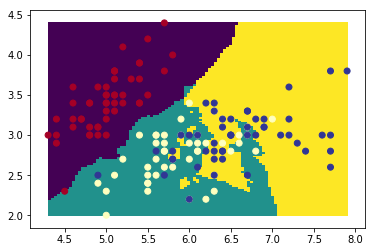

In [45]:


knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(x[:,:2], y)
    
xmin,xmax = x[:,0].min(),x[:,0].max()

ymin,ymax = x[:,1].min(),x[:,1].max()

xx,yy = np.meshgrid(np.linspace(xmin,xmax,100),
                    np.linspace(ymin,ymax,100))

print(xx.shape,yy.shape)
print('xx ravel',xx.ravel().shape)
print(np.c_[xx.ravel(), yy.ravel()].shape)

z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.pcolormesh(xx,yy,z)
plt.scatter(x[:,0],x[:,1],c = iris.target,cmap=plt.cm.get_cmap('RdYlBu', 3))
    
    

In [33]:
print(yy.shape,xx.shape)

(200, 395) (200, 395)
